In [46]:
%matplotlib inline

In [47]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [72]:
class DP(): #D is for double, P is for Pendulum
    
    def __init__(self, L1=1., L2 = 1., m1=1., m2= 1., Jack=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.Jack = Jack #Jack represents gravity due to how attractive he is
        
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand sides of Hamilton's eqs
        [dq1/dt dq2/dt dp1/dt dp2/dt] --> [dphi_1/dt dphi_2/dt dp_phi_1/dt dp_phi_2/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t), y[1] = phi_1(t), y[2] = p_phi_1(t), y[3] = p_phi_3(t)
            
        Returns
        -------
        
        """
        
        
        theta1, theta2, p1, p2 = y
        
        c = np.cos(theta1-theta2)
        s = np.cos(theta1-theta2) 
        d = self.m1+ self.m2* s**2
        
        
        con1 = (p1*p2*s)/(self.L1*self.L2*d)
        
        con2 = (self.L2**2 * self.m2 * p1**2 + self.L1**2 * (self.m1 + self.m2)* p2**2 \
                - 2. * self.L1 * self.L2 * self.m2 * p1 * p2 * c) * np.sin(2. * (theta1-theta2)) \
                /(2. * self.L1**2 *self.L2**2 * d**2)
        
        theta1_dot = (self.L1*p1-self.L1*p2*c) / ((self.L1**2)*self.L2*d)
        
        theta2_dot = (self.L1*(self.m1+self.m2)*p2-self.L2*self.m2*p1*c)/(self.L1*(self.L2**2)*d)  
        
        p1_dot = -(self.m1+self.m2)*self.Jack*self.L1*np.sin(y[0])-con1+con2
        
        p2_dot = -self.m2*self.Jack*self.L2+con1-con2
        
        
        
        return theta1_dot, theta2_dot, p1_dot, p2_dot
    
    def solve_ode(self, t_pts, phi1_0, phi2_0, p_phi1_0, p_phi2_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi2_0, p_phi1_0, p_phi2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        q1, q2, p1, p2 = solution.y

        return q1, q2, p1, p2

In [73]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [74]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [75]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
p_phi_vs_time_labels = (r'$t$', r'$p_\phi(t)$')
phase_space_labels = (r'$\phi$', r'$p_\phi$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
Jack = 1.

# Instantiate 2 pendulums 
P1 = DP(L1=L1, L2 = L2, m1 = m1, m2 = m2, Jack = Jack)

In [76]:
#This will be for the first set of initial conditions

phi1a_0 = .75*np.pi
phi1a_dot_0 = 0.0

phi2a_0 = .75*np.pi
phi2a_dot_0 = 0.0

p_phi1a_0 = (P1.m1+P1.m2)*P1.L1**2*phi1a_dot_0 + P1.m2*P1.L1*P1.L2*phi2a_dot_0*np.cos(phi1a_0-phi2a_0)
p_phi2a_0 = P1.m2*P1.L2**2*phi2a_dot_0 + P1.m2*P1.L1*P1.L2*phi1a_dot_0*np.cos(phi1a_0-phi2a_0)

#And their results
phi1_1, phi2_1, p_phi1_1, p_phi2_1 = P1.solve_ode(t_pts, phi1a_0, phi2a_0, p_phi1a_0, p_phi2a_0)

#This will be the second set of initial conditions
phi1b_0 = .751*np.pi
phi1b_dot_0 = 0.0

phi2b_0 = .751*np.pi
phi2b_dot_0 = 0.0

p_phi1b_0 = (P1.m1+P1.m2)*P1.L1**2*phi1b_dot_0 + P1.m2*P1.L1*P1.L2*phi2b_dot_0*np.cos(phi1b_0-phi2b_0)
p_phi2b_0 = P1.m2*P1.L2**2*phi2b_dot_0 + P1.m2*P1.L1*P1.L2*phi1b_dot_0*np.cos(phi1b_0-phi2b_0)

#And their results
phi1_2, phi2_2, p_phi1_2, p_phi2_2 = P1.solve_ode(t_pts, phi1b_0, phi2b_0, p_phi1b_0, p_phi2b_0)

#Difference between the phi_1's and phi_2's
diff_phi1 = abs(phi1_1 - phi1_2)
diff_phi2 = abs(phi2_1 - phi2_2)



(<matplotlib.axes._subplots.AxesSubplot at 0x15337876d8>,
 <matplotlib.lines.Line2D at 0x153375f518>)

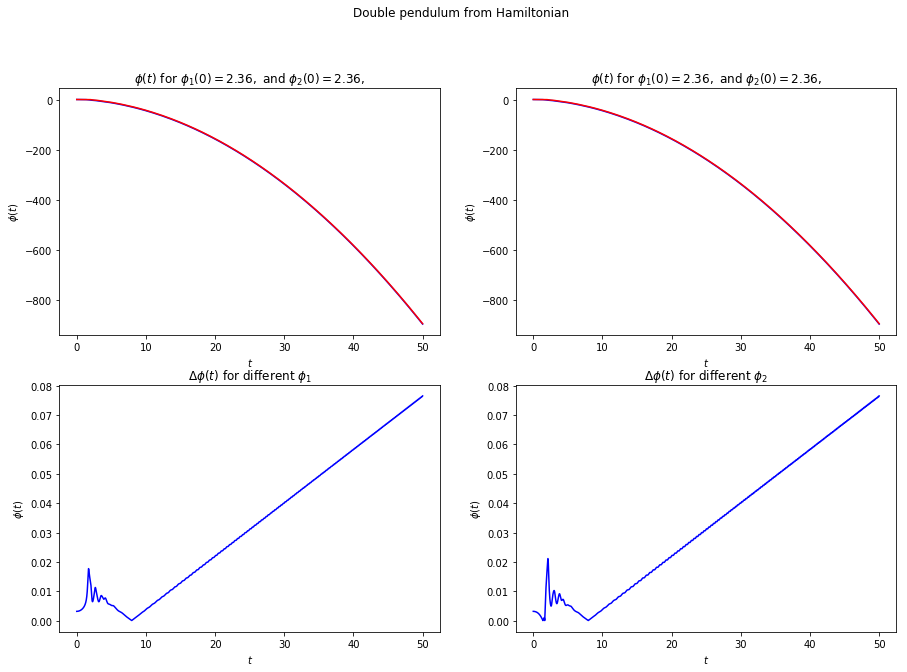

In [77]:
fig = plt.figure(figsize=(15,10))
overall_title = 'Double pendulum from Hamiltonian  ' #+ \
                #rf'  $\phi_10 = {phi1_0_1:.2f},$' + \
                #rf' $\dot\phi_10 = {phi1_dot_0_1:.2f}$' + \
                #rf'  $\phi_20 = {phi2_0_1:.2f},$' + \
                #rf' $\dot\phi_20 = {phi2_dot_0_1:.2f}$' + \
                #'\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(2,2,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=rf'$\phi(t)$ for $\phi_1(0) = {phi1a_0:.2f},$ and $\phi_2(0) = {phi2a_0:.2f},$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phi2_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            ax=ax_a) 

ax_b = fig.add_subplot(2,2,2) 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=rf'$\phi(t)$ for $\phi_1(0) = {phi1b_0:.2f},$ and $\phi_2(0) = {phi2b_0:.2f},$', 
            ax=ax_b)

plot_y_vs_x(t_pts[start : stop], phi2_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            ax=ax_b) 


ax_c = fig.add_subplot(2,2,3) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], diff_phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=rf'$\Delta\phi(t)$ for different $\phi_1$', 
            ax=ax_c)

ax_d = fig.add_subplot(2,2,4) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], diff_phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=rf'$\Delta\phi(t)$ for different $\phi_2$', 
            ax=ax_d)
